In [1]:
%matplotlib inline
import pandas as pd
from dojo.taxonomy import NCBITree
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
import matplotlib

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
tree = NCBITree()

In [4]:
# Read in results table and normalize
df_emb_normalized = pd.read_csv("../results/mp2_gold/rep82/embalmer_taxatable.species.normalized.txt", sep="\t", index_col=0)
df_emb_normalized = df_emb_normalized.apply(pd.to_numeric)

In [5]:
# Group into same samples to check variance
groups = [".".join(_.split(".")[:3]) for _ in df_emb_normalized.columns]

In [6]:
# Check the standard in the observed species per group
df_emb_normalized = df_emb_normalized.T
grouping = df_emb_normalized.apply(lambda x: x > 0).groupby(groups)

In [7]:
# Print out the results
grouping.sum(axis=1).std(axis=1)

Even.40M.1    5.322588
Even.40M.2    5.539056
Even.40M.3    5.716637
Even.40M.4    5.897199
Log.40M.1     4.955104
Log.40M.2     4.796774
Log.40M.3     5.024609
Log.40M.4     4.807090
dtype: float64

In [8]:
# Accumulate gold standard information
gold_standard = "../data/mp2_gold/results.txt"
!head {gold_standard}
!wc -l {gold_standard}

./mp2_gold/Even_40M_1.ninja.100000.4.fna	Even.40M.1.ninja.100000.4	97360
1049805	69014	1123277	185431	1123070	870968	992030	572477	867904	1138906	1236544	985895	1236542	559307	1256214	1423724	284592	937774	1122191	435258	280354	283643	679897	883154	352472	333668	511691	237561	1217715	1071381	795797	1105104	876142	410358	521004	1132506	1044999	698961	521008	207559	1281126	662476	226185	911129	188937	5851	593117	1306406	1141662	1169210	1226344	1217636	4950	910238	1443112	415426	5661	269797	1905	450396	29540	406327	675808	508771	523841	312017	757424	272844	559292	1007871	559295	927704	559298	1423767	412133	520488	1268237	1053692	443218	1444314	1227460	1085540	1036672	1227486	441959	1230460	1417229	662480	333146	887288	1094564	1033806	396588	1140003	393130	999378	1080365	941193	44689	744533	1230451	284812	284811	471854	1111078	1185697	1111072	1154807
447	200	738	2356	262	408	156	323	227	251	463	4062	407	894	243	179	1135	165	436	2917	507	1668	155	349	3131	766	207	2493	330	1132	340	114	227	1

In [9]:
# Parse the gold standard taxatable
counts_dict = {}
with open(gold_standard) as inf:
    for title in inf:
        sample_name = title.split()[1]
        ncbi_tids = next(inf).split()
        counts = next(inf).split()
        counts_dict[sample_name] = dict(zip(ncbi_tids, counts))
df_gold = pd.DataFrame(counts_dict)
df_gold = df_gold.fillna(0)
# Save to file
df_gold.to_csv("../results/mp2_gold/gold.ncbitid.txt", sep='\t', float_format="%d")

In [10]:
df_gold.head()

,Even.40M.1.ninja,Even.40M.1.ninja.1000.1,Even.40M.1.ninja.1000.2,Even.40M.1.ninja.1000.3,Even.40M.1.ninja.1000.4,Even.40M.1.ninja.1000.5,Even.40M.1.ninja.10000.1,Even.40M.1.ninja.10000.2,Even.40M.1.ninja.10000.3,Even.40M.1.ninja.10000.4,...,Log.40M.4.ninja.1000000.1,Log.40M.4.ninja.1000000.2,Log.40M.4.ninja.1000000.3,Log.40M.4.ninja.1000000.4,Log.40M.4.ninja.1000000.5,Log.40M.4.ninja.10000000.1,Log.40M.4.ninja.10000000.2,Log.40M.4.ninja.10000000.3,Log.40M.4.ninja.10000000.4,Log.40M.4.ninja.10000000.5
1002368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002805,0,0,0,0,0,0,0,0,0,0,...,1193,1163,1098,1169,1148,11575,11736,11562,11765,11603
1007871,34937,0,3,0,2,3,16,6,11,5,...,0,0,0,0,0,0,0,0,0,0
1028567,0,0,0,0,0,0,0,0,0,0,...,1126,1146,1139,1210,1138,11601,11600,11633,11753,11721
1033737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Used DOJO instead
#!cp ../data/references/a2t.rs81.txt /dev/shm/
# a2t_file_path = "/dev/shm/a2t.rs81.txt"
# !head {a2t_file_path}

In [12]:
# Used DOJO instead
# a2t = {}
# import csv
# with open(a2t_file_path) as inf:
#     csv_inf = csv.reader(inf, delimiter="\t")
#     next(csv_inf)
#     for row in csv_inf:
#         a2t[row[1]] = row[2]
# index_mapping = [a2t[_] for _ in df_gold.index if _ in a2t]d

In [16]:
index_mapping = [tree.green_genes_lineage(int(taxid), depth=8, depth_force=True) for taxid in df_gold.index]
df_gold["green_genes_tax"] = index_mapping
df_gold.to_csv("../results/mp2_gold/gold.strain.txt", sep='\t', float_format="%d")
species = [";".join(_.split(";")[:-1]) for _ in df_gold["green_genes_tax"]]
df_gold_tmp = df_gold.drop("green_genes_tax", axis=1)
df_species = df_gold_tmp.groupby(species).sum(axis=0)
df_species = df_species.fillna(0)
df_species = df_species.apply(pd.to_numeric).astype(int)
df_species.to_csv("../results/mp2_gold/gold.species.txt", sep='\t', float_format="%d")

In [47]:
# Index must be taxonomy
def summarize_df_at_level(df, level):
    level = [";".join(_.split(";")[:level]) for _ in df.index]
    return df.groupby(level).sum(axis=0)

def remove_plasmids(df):
    level = [_ if not "Plasmid" in _ else _.replace("Plasmid", "") for _ in df.index]
    return df.groupby(level).sum(axis=0)

In [58]:
# Analyze results at all levels
spearman_results = []
for i in range(7):
    level = i + 1
    if level == 7:
        _df_obs = df_emb_normalized
        _df_gold = df_species
    else:
        _df_obs = summarize_df_at_level(df_emb_normalized.T, level)
        _df_obs = remove_plasmids(_df_obs).T
        _df_gold = summarize_df_at_level(df_species, level)
    for i, row in _df_obs.iterrows():
        _temp = row[row > 0]
        _temp2 = _df_gold[row.name]
        _temp2 = _temp2[_temp2 > 0]
        _test_set = set(_temp.index)
        _gold_set = set(_temp2.index)
        _intersection =  _test_set.intersection(_gold_set)
        _union = _test_set.union(_gold_set)
        spearman_results.append([row.name, level, _temp.corr(_temp2, method="spearman"), len(_test_set), len(_gold_set), len(_intersection), len(_union), len(_intersection)/len(_union)])
    print("Done with level: %d" % level)
df_results = pd.DataFrame(spearman_results, columns=["sample", "level", "spearman", "num_observed", "num_actual", "num_intersection", "num_union", "percent_intersection"])

Done with level: 1
Done with level: 2
Done with level: 3
Done with level: 4
Done with level: 5
Done with level: 6
Done with level: 7


In [54]:
df_results.head()

,sample,level,spearman,num_observed,num_actual,num_intersection,num_union,percent_intersection
0,Even.40M.1.ninja,1,NaN,2,1,0,3,0.0
1,Even.40M.1.ninja.1000.1,1,NaN,2,1,0,3,0.0
2,Even.40M.1.ninja.1000.2,1,NaN,2,1,0,3,0.0
3,Even.40M.1.ninja.1000.3,1,NaN,2,1,0,3,0.0
4,Even.40M.1.ninja.1000.4,1,NaN,2,1,0,3,0.0


In [52]:
# Missing a Kingdom check
df_obs_kingdom = summarize_df_at_level(df_emb_normalized.T, 1).T
print(df_obs_kingdom.columns)
print(remove_plasmids(summarize_df_at_level(df_emb_normalized.T, 1)).T.columns)

Index(['k__Archaea', 'k__ArchaeaPlasmid', 'k__Bacteria', 'k__BacteriaPlasmid',
       'k__Viruses'],
      dtype='object')
Index(['k__Archaea', 'k__Bacteria', 'k__Viruses'], dtype='object')


In [22]:
# Missing a Kingdom check
df_gold_kingdom = summarize_df_at_level(df_species, 1).T
df_gold_kingdom.columns

Index(['k__Archaea', 'k__Bacteria', 'k__Eukaryota'], dtype='object')

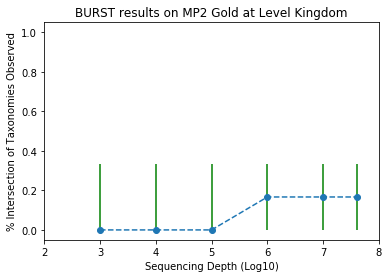

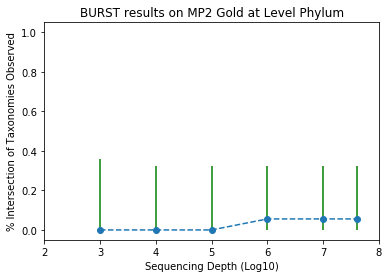

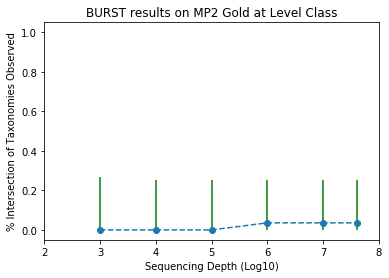

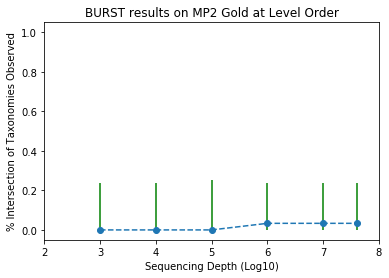

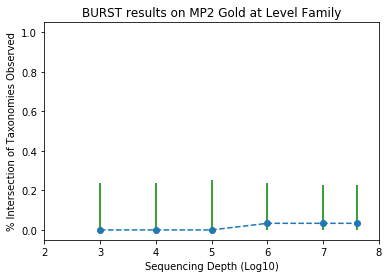

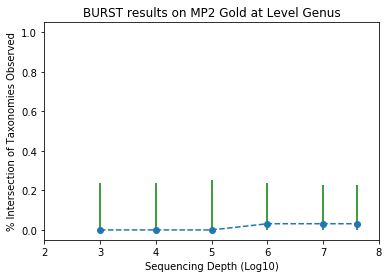

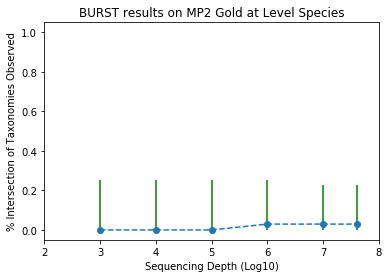

In [59]:
tax = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

# Make error bars plots
depths = [int(_.split('.')[-2]) if _[-5:] != 'ninja' else 40000000 for _ in df_results["sample"]]
df_results["depths"] = np.log10(depths)
for i in range(7):
    level = i + 1
    df_results_kingdom = df_results[df_results["level"] == level]
    groups = [".".join(_.split(".")[:-1]) for _ in df_results_kingdom["sample"]]
    df_results_kingdoms_groups = df_results_kingdom.groupby("depths").median()
    df_results_kingdoms_groups_max = df_results_kingdom.groupby("depths").quantile(.75)
    df_results_kingdoms_groups_min = df_results_kingdom.groupby("depths").quantile(.25)
    plt.figure()
    plt.title("BURST results on MP2 Gold at Level %s" % tax[i])
    plt.ylim(-.05, 1.05)
    plt.xlim(2, 8)
    plt.xlabel("Sequencing Depth (Log10)")
    plt.ylabel("% Intersection of Taxonomies Observed")
    plt.errorbar(df_results_kingdoms_groups.index, df_results_kingdoms_groups["percent_intersection"], yerr=[df_results_kingdoms_groups["percent_intersection"]-df_results_kingdoms_groups_min["percent_intersection"], df_results_kingdoms_groups_max["percent_intersection"]-df_results_kingdoms_groups["percent_intersection"]], fmt='--o', ecolor='g', capthick=2)
#     plt.show()
    plt.savefig("../results/mp2_gold/plots/rep82_mp2_gold_{}_{}.pdf".format(tax[i], 'taxjac'), bbox_inches="tight")

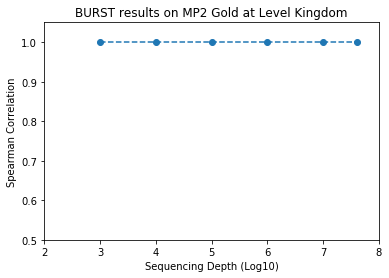

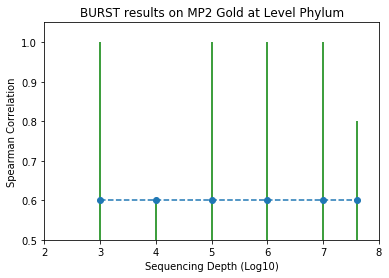

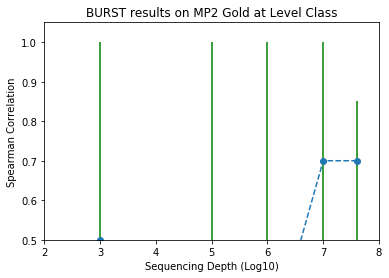

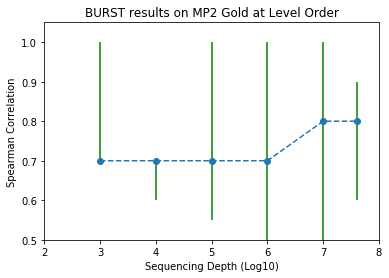

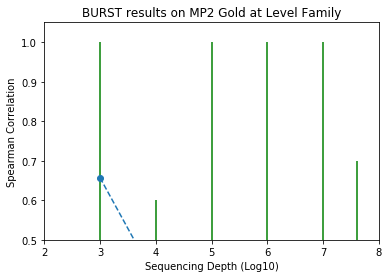

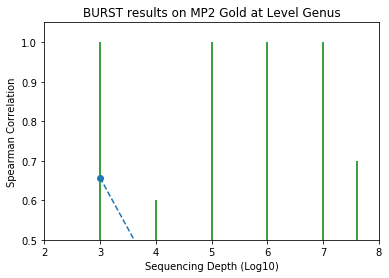

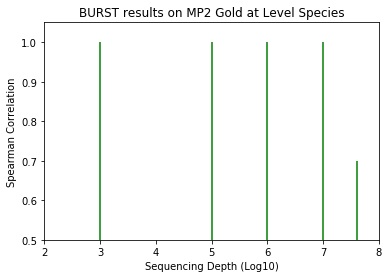

In [60]:
tax = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

# Make error bars plots
depths = [int(_.split('.')[-2]) if _[-5:] != 'ninja' else 40000000 for _ in df_results["sample"]]
df_results["depths"] = np.log10(depths)
for i in range(7):
    level = i + 1
    df_results_kingdom = df_results[df_results["level"] == level]
    groups = [".".join(_.split(".")[:-1]) for _ in df_results_kingdom["sample"]]
    df_results_kingdoms_groups = df_results_kingdom.groupby("depths").median()
    df_results_kingdoms_groups_max = df_results_kingdom.groupby("depths").quantile(.75)
    df_results_kingdoms_groups_min = df_results_kingdom.groupby("depths").quantile(.25)
    plt.figure()
    plt.title("BURST results on MP2 Gold at Level %s" % tax[i])
    plt.ylim(.5, 1.05)
    plt.xlim(2, 8)
    plt.xlabel("Sequencing Depth (Log10)")
    plt.ylabel("Spearman Correlation")
    plt.errorbar(df_results_kingdoms_groups.index, df_results_kingdoms_groups["spearman"], yerr=[df_results_kingdoms_groups["spearman"]-df_results_kingdoms_groups_min["spearman"], df_results_kingdoms_groups_max["spearman"]-df_results_kingdoms_groups["spearman"]], fmt='--o', ecolor='g', capthick=2)
#     plt.show()
    plt.savefig("../results/mp2_gold/plots/rep82_mp2_gold_{}_{}.pdf".format(tax[i], 'spearman'), bbox_inches="tight")

In [25]:
def drop_low_abundance(df):
    depths_thresh_per_sample = df.sum(axis=0)*.02
    for name, thresh in zip(df.columns, depths_thresh_per_sample):
        df.loc[df[name] <= thresh, name] = 0
    return df

In [26]:
spearman_results = []
# Analyze results at all levels dropping low abundance
for i in range(7):
    level = i + 1
    if level == 7:
        _df_obs = df_emb_normalized
        _df_gold = df_species
    else:
        _df_obs = summarize_df_at_level(df_emb_normalized.T, level).T
        _df_gold = summarize_df_at_level(df_species, level)
    _df_obs = drop_low_abundance(_df_obs.T).T
    _df_gold = drop_low_abundance(_df_gold)
    for i, row in _df_obs.iterrows():
        _temp = row[row > 0]
        _temp2 = _df_gold[row.name]
        _temp2 = _temp2[_temp2 > 0]
        _test_set = set(_temp.index)
        _gold_set = set(_temp2.index)
        _intersection =  _test_set.intersection(_gold_set)
        _union = _test_set.union(_gold_set)
        spearman_results.append([row.name, level, _temp.corr(_temp2, method="spearman"), len(_test_set), len(_gold_set), len(_intersection), len(_union), len(_intersection)/len(_union)])
    print("Done with level: %d" % level)
df_results_thresh = pd.DataFrame(spearman_results, columns=["sample", "level", "spearman", "num_observed", "num_actual", "num_intersection", "num_union", "percent_intersection"])

Done with level: 1
Done with level: 2
Done with level: 3
Done with level: 4
Done with level: 5
Done with level: 6
Done with level: 7


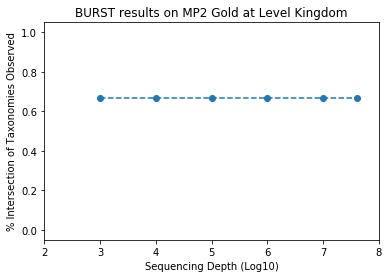

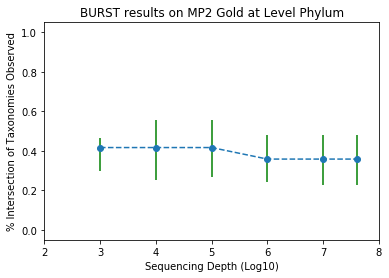

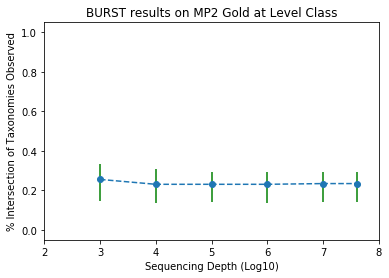

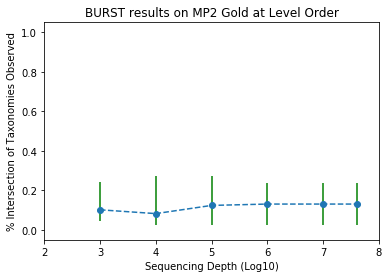

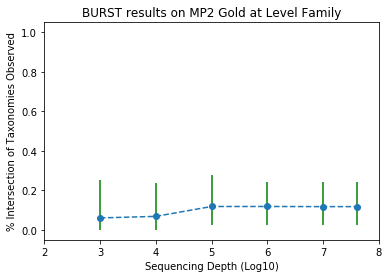

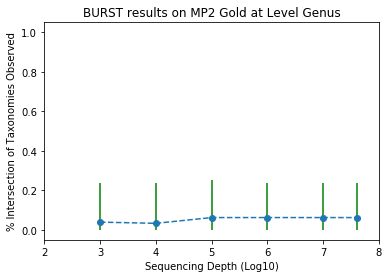

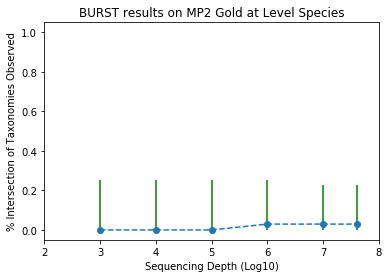

In [45]:
tax = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

# Make error bars plots
depths = [int(_.split('.')[-2]) if _[-5:] != 'ninja' else 40000000 for _ in df_results["sample"]]
df_results_thresh["depths"] = np.log10(depths)
for i in range(7):
    level = i + 1
    df_results_kingdom = df_results_thresh[df_results_thresh["level"] == level]
    groups = [".".join(_.split(".")[:-1]) for _ in df_results_kingdom["sample"]]
    df_results_kingdoms_groups = df_results_kingdom.groupby("depths").median()
    df_results_kingdoms_groups_max = df_results_kingdom.groupby("depths").quantile(.75)
    df_results_kingdoms_groups_min = df_results_kingdom.groupby("depths").quantile(.25)
    plt.figure()
    plt.title("BURST results on MP2 Gold at Level %s" % tax[i])
    plt.ylim(-.05, 1.05)
    plt.xlim(2, 8)
    plt.xlabel("Sequencing Depth (Log10)")
    plt.ylabel("% Intersection of Taxonomies Observed")
    plt.errorbar(df_results_kingdoms_groups.index, df_results_kingdoms_groups["percent_intersection"], yerr=[df_results_kingdoms_groups["percent_intersection"]-df_results_kingdoms_groups_min["percent_intersection"], df_results_kingdoms_groups_max["percent_intersection"]-df_results_kingdoms_groups["percent_intersection"]], fmt='--o', ecolor='g', capthick=2)
#     plt.show()
    plt.savefig("../results/mp2_gold/plots/rep82_mp2_gold_{}_{}_filter.pdf".format(tax[i], 'taxjac'), bbox_inches="tight")

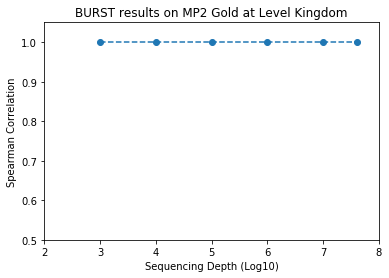

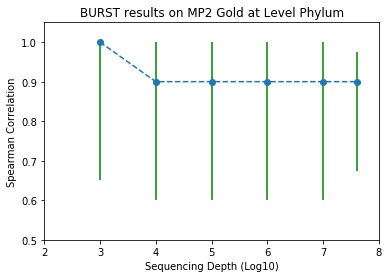

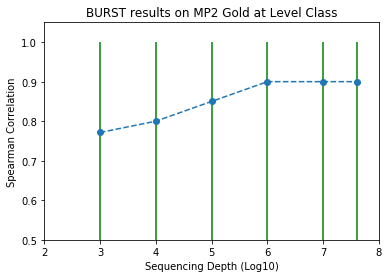

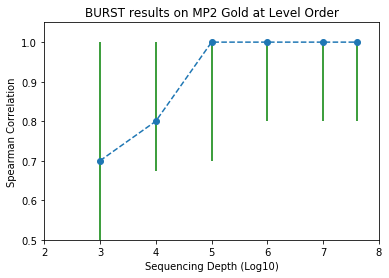

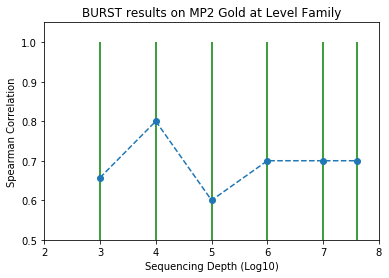

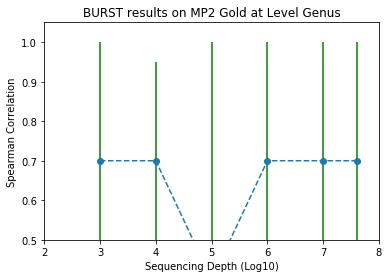

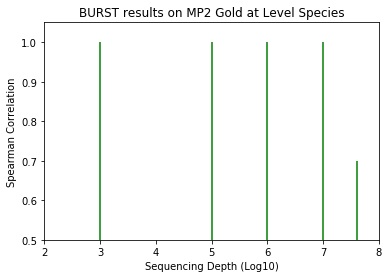

In [46]:
tax = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

# Make error bars plots
depths = [int(_.split('.')[-2]) if _[-5:] != 'ninja' else 40000000 for _ in df_results["sample"]]
df_results["depths"] = np.log10(depths)
for i in range(7):
    level = i + 1
    df_results_kingdom = df_results_thresh[df_results_thresh["level"] == level]
    groups = [".".join(_.split(".")[:-1]) for _ in df_results_kingdom["sample"]]
    df_results_kingdoms_groups = df_results_kingdom.groupby("depths").median()
    df_results_kingdoms_groups_max = df_results_kingdom.groupby("depths").quantile(.75)
    df_results_kingdoms_groups_min = df_results_kingdom.groupby("depths").quantile(.25)
    plt.figure()
    plt.title("BURST results on MP2 Gold at Level %s" % tax[i])
    plt.ylim(.5, 1.05)
    plt.xlim(2, 8)
    plt.xlabel("Sequencing Depth (Log10)")
    plt.ylabel("Spearman Correlation")
    plt.errorbar(df_results_kingdoms_groups.index, df_results_kingdoms_groups["spearman"], yerr=[df_results_kingdoms_groups["spearman"]-df_results_kingdoms_groups_min["spearman"], df_results_kingdoms_groups_max["spearman"]-df_results_kingdoms_groups["spearman"]], fmt='--o', ecolor='g', capthick=2)
#     plt.show()
    plt.savefig("../results/mp2_gold/plots/rep82_mp2_gold_{}_{}_filter.pdf".format(tax[i], 'spearman'), bbox_inches="tight")